#Flight Delay prediction
Exploratory Data Analysis






Nikhil Kumar

Mounting the drive to work on the dataset directly from the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d usdot/flight-delays

flight-delays.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

airlines.csv  airports.csv  flight-delays.zip  flights.csv  kaggle.json


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  flight-delays.zip
replace airlines.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Importing relevant **libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

Importing the flights dataset

In [ ]:
flights=pd.read_csv("/content/gdrive/MyDrive/Kaggle/flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
flights.info()
flights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.shape

(5819079, 31)

There are 5819079 rows and 31 columns in the dataset.

Getting some basic information from the dataset

In [ ]:
number_of_delayed = flights["DEPARTURE_DELAY"].apply(lambda s: 1 if s!=0 else 0);
print("Total number of flights: "+str(len(flights)))
print("Number of cancelled flights: "+str(sum(flights["CANCELLED"])))
print("Number of delayed flights: "+str(sum(number_of_delayed)))
print("Number of diverted flights: "+str(sum(flights["DIVERTED"])))


print("Number of not cancelled flights: "+str(len(flights)-sum(flights["CANCELLED"])))
print("Number of not delayed flights: "+str(len(flights)-sum(number_of_delayed)))
print("Percentage of cancelled flights: "+str((sum(flights["CANCELLED"])*1.0/len(flights))*100)+"%")
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(flights))*100)+"%")

Total number of flights: 5819079
Number of cancelled flights: 89884
Number of delayed flights: 5489719
Number of diverted flights: 15187
Number of not cancelled flights: 5729195
Number of not delayed flights: 329360
Percentage of cancelled flights: 1.5446430612129514%
Percentage of delayed flights: 94.33999779002829%


Printing no of null values in respective columns

In [ ]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((flights.isnull().sum()  / flights.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [ ]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
CANCELLATION_REASON,98.455
WEATHER_DELAY,81.725
LATE_AIRCRAFT_DELAY,81.725
AIRLINE_DELAY,81.725
SECURITY_DELAY,81.725
AIR_SYSTEM_DELAY,81.725
AIR_TIME,1.806
ARRIVAL_DELAY,1.806
ELAPSED_TIME,1.806
WHEELS_ON,1.590


Dropping unnecessary columns from the dataset which have very large number of null values.

In [ ]:
flights.drop(columns=['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','CANCELLATION_REASON'],inplace=True)

Updated dataset

In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


Finding mode which can be used as 'most likely' in categorical dataset

In [ ]:
flights.mode()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,10,16,4,WN,469,N480HA,ATL,ATL,600,555.0,-3.0,12.0,1357.170841,85.0,137.006189,113.511628,337,1471.468609,5.0,1305,1645.0,-8.0,0,0


Filling NAN values with appropriate methods , i.e. most likely in place of categorical data , mean for unsigned numerical data which are without reference whereas in case of scheduled time using the corresponding actual time in terms of arrival or departure.

In [ ]:
flights['TAIL_NUMBER'].fillna('N480HA',inplace=True)

In [ ]:
flights['DEPARTURE_TIME'].fillna(flights['SCHEDULED_DEPARTURE'],inplace=True)

In [ ]:
flights['DEPARTURE_DELAY'].fillna(flights['DEPARTURE_DELAY'].mean(),inplace=True)
flights['TAXI_OUT'].fillna(flights['TAXI_OUT'].mean(),inplace=True)
flights['WHEELS_OFF'].fillna(flights['WHEELS_OFF'].mean(),inplace=True)
flights['SCHEDULED_TIME'].fillna(flights['SCHEDULED_DEPARTURE'],inplace=True)
flights['ELAPSED_TIME'].fillna(flights['ELAPSED_TIME'].mean(),inplace=True)
flights['AIR_TIME'].fillna(flights['AIR_TIME'].mean(),inplace=True)
flights['WHEELS_ON'].fillna(flights['WHEELS_ON'].mean(),inplace=True)
flights['TAXI_IN'].fillna(flights['TAXI_IN'].mean(),inplace=True)
flights['ARRIVAL_TIME'].fillna(flights['SCHEDULED_ARRIVAL'],inplace=True)
flights['ARRIVAL_DELAY'].fillna(flights['ARRIVAL_DELAY'].mean(),inplace=True)

All the null values are filled and hence there are no null values.

In [ ]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

changing the data type of date from object to Date

In [ ]:
flights['DATE'] = ''
flights['DATE'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])

In [ ]:
flights.DATE

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: DATE, Length: 5819079, dtype: datetime64[ns]

In [ ]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,2015-12-31
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,2015-12-31
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,2015-12-31
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,2015-12-31


Correlation matrix

In [ ]:
corr_matrix=flights.corr()
print(corr_matrix)

                     YEAR     MONTH  ...  DIVERTED  CANCELLED
YEAR                  NaN       NaN  ...       NaN        NaN
MONTH                 NaN  1.000000  ... -0.000991  -0.055043
DAY                   NaN  0.008874  ...  0.001981  -0.003537
DAY_OF_WEEK           NaN -0.007847  ... -0.001442  -0.022230
FLIGHT_NUMBER         NaN -0.020746  ...  0.003802   0.037895
SCHEDULED_DEPARTURE   NaN  0.000207  ... -0.000752   0.011752
DEPARTURE_TIME        NaN -0.004085  ...  0.001425   0.008055
DEPARTURE_DELAY       NaN -0.021994  ...  0.022963   0.033099
TAXI_OUT              NaN -0.013117  ...  0.012251   0.005062
WHEELS_OFF            NaN -0.004946  ...  0.001667   0.004805
SCHEDULED_TIME        NaN  0.010784  ...  0.014012  -0.027827
ELAPSED_TIME          NaN  0.001871  ...       NaN        NaN
AIR_TIME              NaN  0.003379  ...       NaN        NaN
DISTANCE              NaN  0.011437  ...  0.012896  -0.032853
WHEELS_ON             NaN -0.008917  ...  0.006098        NaN
TAXI_IN 

Plotting the Heatmap

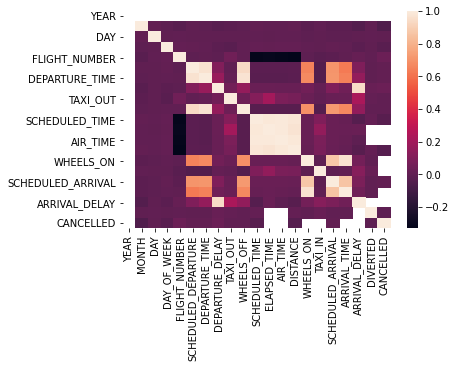

In [ ]:
sns.heatmap(corr_matrix)

Dropping the columns that are not relevant for prediction

In [ ]:
flights = flights.drop(["AIRLINE","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","DEPARTURE_DELAY","TAXI_OUT", 
                            "WHEELS_OFF","SCHEDULED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE","WHEELS_ON","TAXI_IN", 
                            "SCHEDULED_ARRIVAL","ARRIVAL_TIME","DIVERTED","AIR_TIME","CANCELLED"], axis = 1)

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 9 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   ORIGIN_AIRPORT       object        
 5   DESTINATION_AIRPORT  object        
 6   SCHEDULED_DEPARTURE  int64         
 7   ARRIVAL_DELAY        float64       
 8   DATE                 datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 399.6+ MB


In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE
0,2015,1,1,4,ANC,SEA,5,-22.0,2015-01-01
1,2015,1,1,4,LAX,PBI,10,-9.0,2015-01-01
2,2015,1,1,4,SFO,CLT,20,5.0,2015-01-01
3,2015,1,1,4,LAX,MIA,20,-9.0,2015-01-01
4,2015,1,1,4,SEA,ANC,25,-21.0,2015-01-01


Plotting the Box plot to check the outliers.

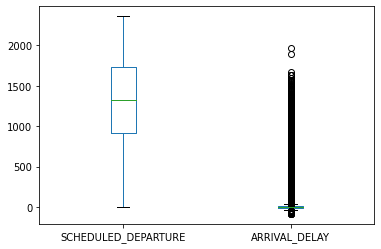

In [ ]:
flights[["SCHEDULED_DEPARTURE","ARRIVAL_DELAY"]].plot.box()

Removing the outliers from the dataset and reshaping the data

In [ ]:
Q1 = np.percentile(flights['ARRIVAL_DELAY'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(flights['ARRIVAL_DELAY'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", flights.shape) 
  
# Upper bound
upper = np.where(flights['ARRIVAL_DELAY'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(flights['ARRIVAL_DELAY'] <= (Q1-1.5*IQR))
  
#Removing the Outliers
flights.drop(upper[0], inplace = True)
flights.drop(lower[0], inplace = True)
  
print("New Shape: ", flights.shape) 

Old Shape:  (5819079, 10)
New Shape:  (5819079, 10)


Again checking the outliers using the Box Plot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


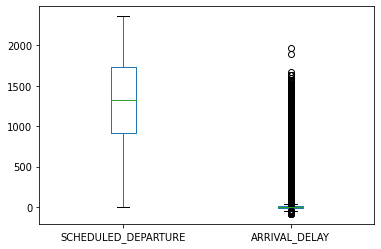

In [ ]:
flights[["SCHEDULED_DEPARTURE","ARRIVAL_DELAY"]].plot.box()

Outliers are almost removed.

Plot percentage delay by month

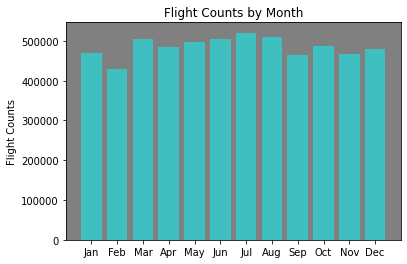

In [ ]:
month_count= flights["MONTH"].value_counts()
month_count = month_count.sort_index()
month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
y_pos=np.arange(len(month))

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(month,month_count,align='center',alpha=0.5,color='cyan')
ax.set_facecolor('gray')
plt.xticks(y_pos,month)
plt.ylabel('Flight Counts')
plt.title('Flight Counts by Month')
plt.show()

Plot percentage delay by Day

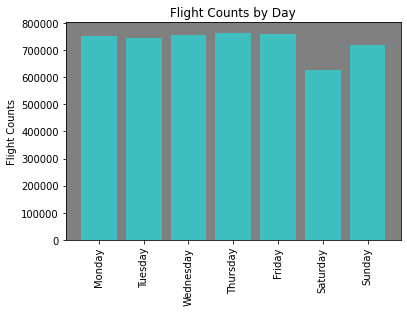

In [ ]:
day_count= flights["DAY_OF_WEEK"].value_counts()
day_count = day_count.sort_index()
day= np.array(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
y_pos=np.arange(len(day))

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(day,day_count,align='center',alpha=0.5,color='cyan')
ax.set_facecolor('gray')
plt.xticks(y_pos, day,rotation=90)
plt.ylabel('Flight Counts')
plt.title('Flight Counts by Day')
plt.show()

 Which months had the highest percentage of departure and arrival delays?

Plotting Histogram for numerical data to chek the distribution of the data in different columns.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


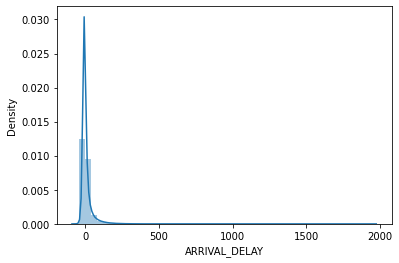

In [ ]:

sns.distplot( flights['ARRIVAL_DELAY'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


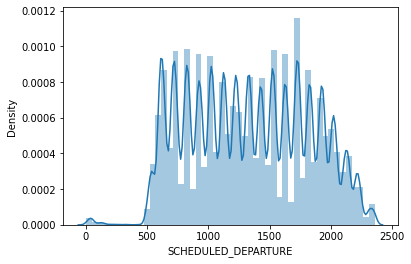

In [ ]:
sns.distplot( flights['SCHEDULED_DEPARTURE'])

Here we find that most of the columns are normally distributed.

Plotting the bar graph for categorical data to check the distribution.

New feature generation as RESULT using ARRIVAL_DELAY

In [ ]:
#FEATURE GENERATION FROM ARRIVAL_DELAY, USING IF ELSE STATEMENT:
flights['RESULT']=flights['ARRIVAL_DELAY'].apply(lambda x: 1 if x>15 else 0)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE,RESULT
0,2015,1,1,4,ANC,SEA,5,-22.0,2015-01-01,0
1,2015,1,1,4,LAX,PBI,10,-9.0,2015-01-01,0
2,2015,1,1,4,SFO,CLT,20,5.0,2015-01-01,0
3,2015,1,1,4,LAX,MIA,20,-9.0,2015-01-01,0
4,2015,1,1,4,SEA,ANC,25,-21.0,2015-01-01,0


In [ ]:
flights.RESULT.value_counts()

0    4795581
1    1023498
Name: RESULT, dtype: int64

In [ ]:
flights.SCHEDULED_DEPARTURE.value_counts()

600    109943
700     82910
800     51875
630     39473
900     39419
        ...  
345         1
344         1
337         1
303         1
358         1
Name: SCHEDULED_DEPARTURE, Length: 1321, dtype: int64

**EXploratory Data Analysis ,Data Cleaning and Pre-processing for Flights dataset is complete.**

**Exploratory Data Analysis of Weather2 dataset.**

In [ ]:
weather2=pd.read_csv("weather2.csv")
weather2.info()
weather2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   NAME     730 non-null    object 
 2   DATE     730 non-null    object 
 3   AWND     730 non-null    float64
 4   PGTM     0 non-null      float64
 5   PRCP     730 non-null    float64
 6   SNOW     365 non-null    float64
 7   SNWD     365 non-null    float64
 8   TAVG     730 non-null    int64  
 9   TMAX     730 non-null    int64  
 10  TMIN     730 non-null    int64  
 11  WDF2     730 non-null    int64  
 12  WDF5     725 non-null    float64
 13  WSF2     730 non-null    float64
 14  WSF5     725 non-null    float64
 15  WT01     240 non-null    float64
 16  WT02     8 non-null      float64
 17  WT03     50 non-null     float64
 18  WT04     4 non-null      float64
 19  WT05     0 non-null      float64
 20  WT06     4 non-null      float64
 21  WT08     143 non

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,NaN,0.00,0.0,3.1,18,30,11,330,330.0,19.9,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,NaN,0.00,0.0,3.1,17,28,6,160,160.0,16.1,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,NaN,0.00,0.1,3.1,26,33,12,350,340.0,29.1,35.1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,NaN,0.00,0.0,3.1,5,12,-7,340,340.0,25.9,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,NaN,0.06,0.5,3.1,-7,1,-11,240,280.0,15.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
weather2.shape

(730, 23)

In [ ]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((weather2.isnull().sum()  / weather2.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [ ]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
PGTM,100.000
WT05,100.000
WT06,99.452
WT04,99.452
WT09,99.315
WT02,98.904
WT03,93.151
WT08,80.411
WT01,67.123
SNOW,50.000


In [ ]:
# select columns having more than 40% missing values.
columnstodrop=df_missing[df_missing['Percentage'] > 40]
columnstodrop.index

Index(['PGTM', 'SNOW', 'SNWD', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'WT09'],
      dtype='object')

In [ ]:
# drop the columns which having more than 40% missing values
weather2=weather2.drop(columnstodrop.index,axis=1)

In [ ]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
WDF5,0.685
WSF5,0.685
STATION,0.000
NAME,0.000
DATE,0.000
AWND,0.000
PRCP,0.000
TAVG,0.000
TMAX,0.000
TMIN,0.000


In [ ]:
weather2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   NAME     730 non-null    object 
 2   DATE     730 non-null    object 
 3   AWND     730 non-null    float64
 4   PRCP     730 non-null    float64
 5   TAVG     730 non-null    int64  
 6   TMAX     730 non-null    int64  
 7   TMIN     730 non-null    int64  
 8   WDF2     730 non-null    int64  
 9   WDF5     725 non-null    float64
 10  WSF2     730 non-null    float64
 11  WSF5     725 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 68.6+ KB


In [ ]:
weather2.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       5
WSF2       0
WSF5       5
dtype: int64

Filling the NA values with mean

In [ ]:
weather2['WSF5'].fillna(weather2['WSF5'].mean(),inplace=True)
weather2['WDF5'].fillna(weather2['WDF5'].mean(),inplace=True)

In [ ]:
weather2.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
dtype: int64

In [ ]:
weather2

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,0.00,18,30,11,330,330.0,19.9,25.9
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,0.00,17,28,6,160,160.0,16.1,19.0
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,0.00,26,33,12,350,340.0,29.1,35.1
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,0.00,5,12,-7,340,340.0,25.9,34.0
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,0.06,-7,1,-11,240,280.0,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-27,4.47,0.01,42,48,34,90,90.0,15.0,17.0
726,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-28,5.14,0.11,44,48,41,10,10.0,13.0,15.0
727,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-29,2.91,0.00,44,54,36,250,250.0,12.1,13.0
728,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-30,6.93,0.01,46,49,40,60,360.0,16.1,18.1


In [ ]:
weather2.DATE

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
725    2015-12-27
726    2015-12-28
727    2015-12-29
728    2015-12-30
729    2015-12-31
Name: DATE, Length: 730, dtype: object

Changing data type of Date

In [ ]:
weather2.DATE=pd.to_datetime(weather2.DATE)

In [ ]:
weather2.DATE

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
725   2015-12-27
726   2015-12-28
727   2015-12-29
728   2015-12-30
729   2015-12-31
Name: DATE, Length: 730, dtype: datetime64[ns]

Correlation matrix

In [ ]:
weather2.corr()

,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
AWND,1.000000,0.165168,0.004242,-0.052196,0.013884,0.242926,0.237208,0.827231,0.805701
PRCP,0.165168,1.000000,0.100297,0.046136,0.092046,-0.004805,-0.066093,0.181120,0.217675
TAVG,0.004242,0.100297,1.000000,0.972330,0.980515,0.031644,0.020421,0.125823,0.093233
TMAX,-0.052196,0.046136,0.972330,1.000000,0.937867,0.040049,0.031257,0.100894,0.062419
TMIN,0.013884,0.092046,0.980515,0.937867,1.000000,0.029573,0.025529,0.123546,0.083146
WDF2,0.242926,-0.004805,0.031644,0.040049,0.029573,1.000000,0.696509,0.365704,0.317931
WDF5,0.237208,-0.066093,0.020421,0.031257,0.025529,0.696509,1.000000,0.351077,0.256581
WSF2,0.827231,0.181120,0.125823,0.100894,0.123546,0.365704,0.351077,1.000000,0.933398
WSF5,0.805701,0.217675,0.093233,0.062419,0.083146,0.317931,0.256581,0.933398,1.000000


Heatmap

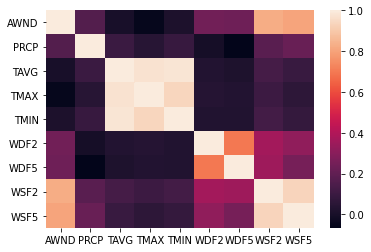

In [ ]:
sns.heatmap(weather2.corr())

Plotting Scatter matrix to see the relationships between two variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9919422110>,
      dtype=object)

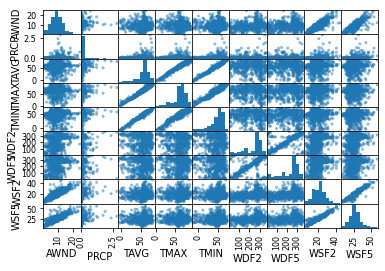

In [ ]:
pd.plotting.scatter_matrix(weather2)

Box plot 

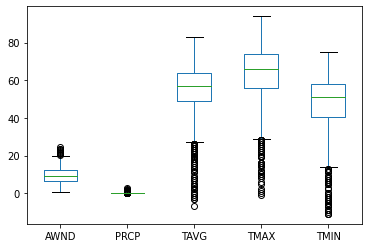

In [ ]:
weather2[['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN']].plot.box()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

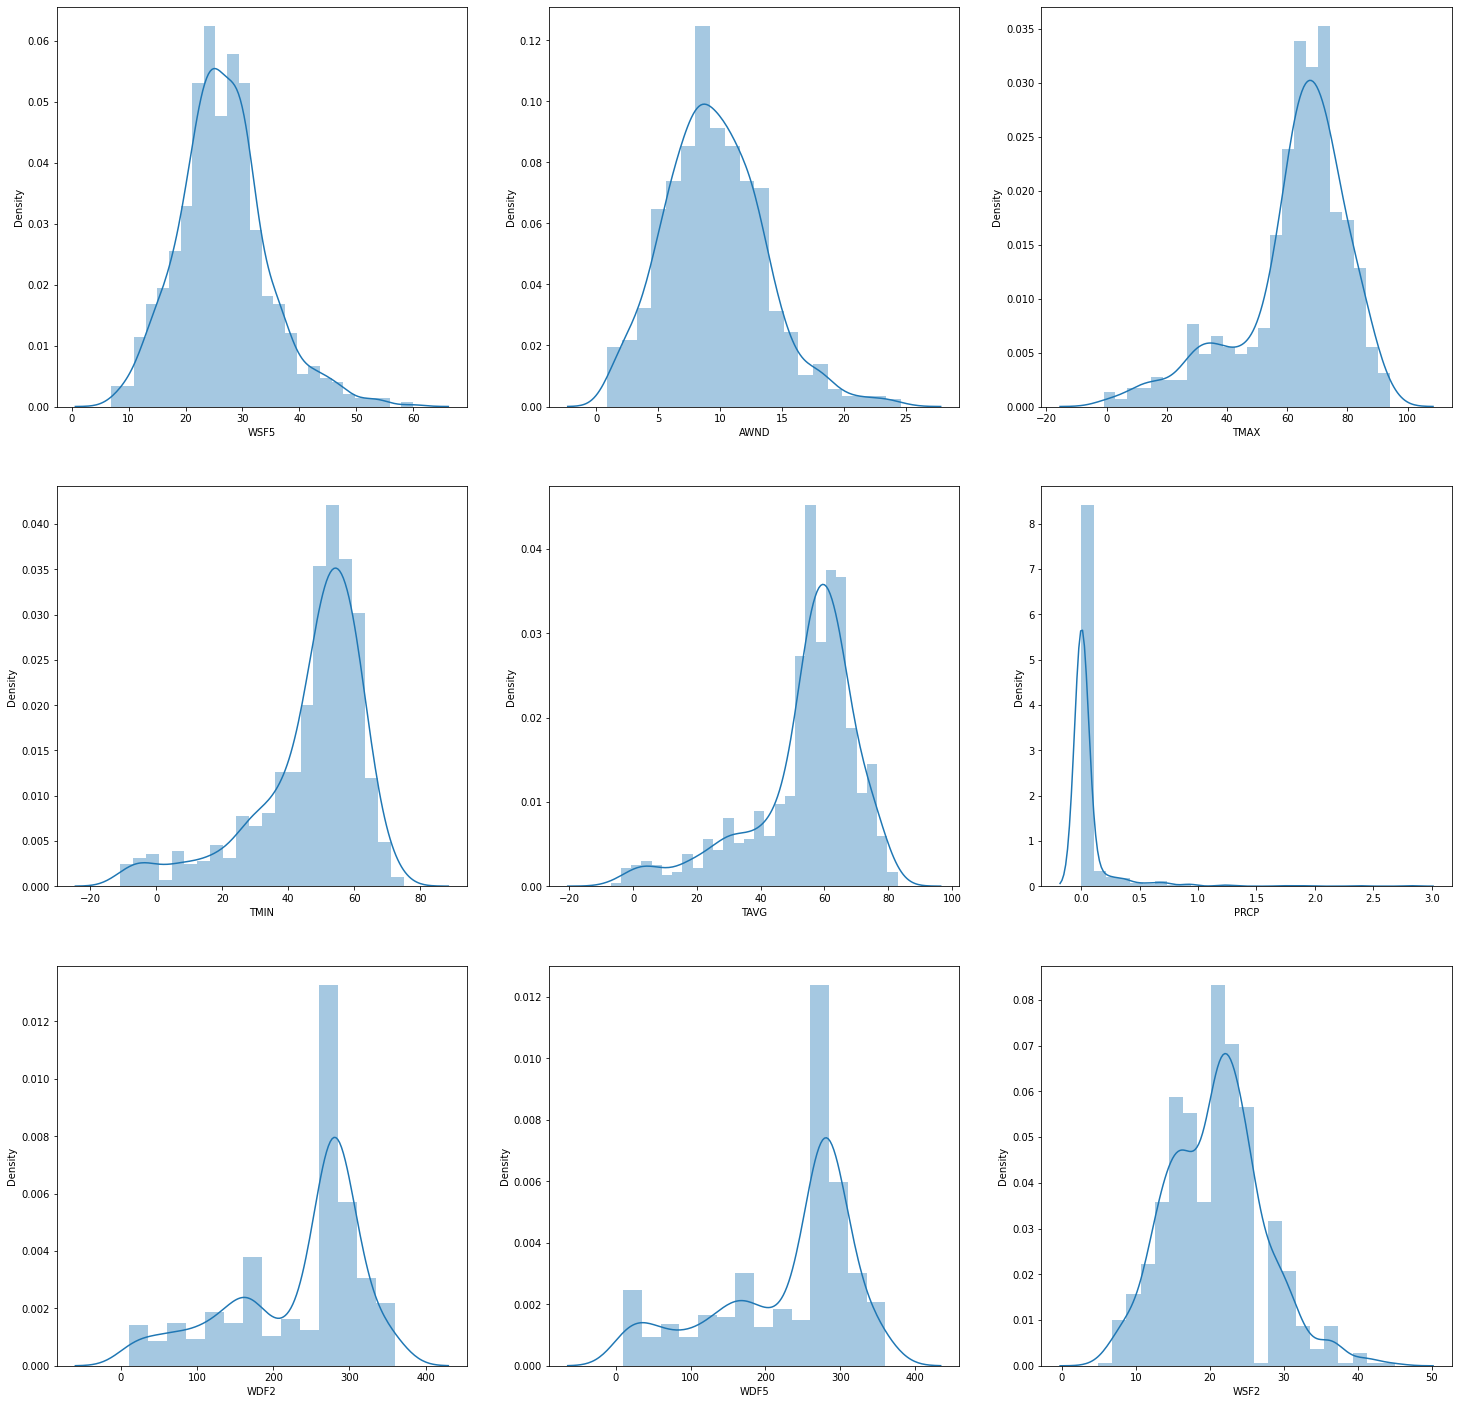

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(25,25))
sns.distplot( weather2['WSF5'],ax=axes[0, 0])
sns.distplot( weather2['AWND'], ax=axes[0, 1])
sns.distplot( weather2['TMAX'], ax=axes[0, 2])
sns.distplot( weather2['TMIN'], ax=axes[1, 0])
sns.distplot( weather2['TAVG'], ax=axes[1, 1])
sns.distplot( weather2['PRCP'], ax=axes[1, 2])
sns.distplot( weather2['WDF2'], ax=axes[2, 0])
sns.distplot( weather2['WDF5'], ax=axes[2, 1])
sns.distplot( weather2['WSF2'], ax=axes[2, 2])

**Exploratory Data Analysis ,Data Cleaning and Pre-processing for weather2 dataset is complete.**

Taking random sample from flights dataset

In [ ]:
f=flights.sample(1000)

Merging the two dataset using DATE feature

In [ ]:
f1=pd.merge(f,weather2,on='DATE',how='inner')

In [ ]:
f1

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE,RESULT,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2015,3,2,1,ORD,MSP,648,-6.0,2015-03-02,0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",8.05,0.00,19,26,9,150,140.0,15.0,19.0
1,2015,3,2,1,ORD,MSP,648,-6.0,2015-03-02,0,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",7.16,0.00,56,61,50,270,210.0,18.1,25.1
2,2015,3,2,1,BOS,IAD,947,-5.0,2015-03-02,0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",8.05,0.00,19,26,9,150,140.0,15.0,19.0
3,2015,3,2,1,BOS,IAD,947,-5.0,2015-03-02,0,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",7.16,0.00,56,61,50,270,210.0,18.1,25.1
4,2015,3,2,1,VLD,ATL,1025,98.0,2015-03-02,1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",8.05,0.00,19,26,9,150,140.0,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,1,9,5,EGE,DFW,1359,16.0,2015-01-09,1,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",3.58,0.00,54,63,51,290,290.0,13.0,16.1
1996,2015,4,21,2,ATL,MCO,540,-16.0,2015-04-21,0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",19.91,0.03,38,41,34,310,290.0,29.1,38.9
1997,2015,4,21,2,ATL,MCO,540,-16.0,2015-04-21,0,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",10.51,0.00,56,59,54,230,220.0,21.0,25.1
1998,2015,12,24,4,DTW,DFW,1513,-17.0,2015-12-24,0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",10.51,0.00,26,27,23,260,270.0,25.1,32.0


In [ ]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 2000 non-null   int64         
 1   MONTH                2000 non-null   int64         
 2   DAY                  2000 non-null   int64         
 3   DAY_OF_WEEK          2000 non-null   int64         
 4   ORIGIN_AIRPORT       2000 non-null   object        
 5   DESTINATION_AIRPORT  2000 non-null   object        
 6   SCHEDULED_DEPARTURE  2000 non-null   int64         
 7   ARRIVAL_DELAY        2000 non-null   float64       
 8   DATE                 2000 non-null   datetime64[ns]
 9   RESULT               2000 non-null   int64         
 10  STATION              2000 non-null   object        
 11  NAME                 2000 non-null   object        
 12  AWND                 2000 non-null   float64       
 13  PRCP                 2000 non-nul

Dropping irrelevant features for better prediction

In [ ]:
f1.drop(['YEAR','MONTH','DAY','DATE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','STATION','NAME','DAY_OF_WEEK'],axis=1,inplace=True)

In [ ]:
f1.isnull().sum()

SCHEDULED_DEPARTURE    0
ARRIVAL_DELAY          0
RESULT                 0
AWND                   0
PRCP                   0
TAVG                   0
TMAX                   0
TMIN                   0
WDF2                   0
WDF5                   0
WSF2                   0
WSF5                   0
dtype: int64

Importing relevant libraries for model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import math

selecting the independent variables

In [ ]:
x=f1.drop('RESULT',axis=1)

In [ ]:
x.shape

(2000, 11)

Selecting the dependent variable

In [ ]:
y=f1.RESULT

Scaling the dataset

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

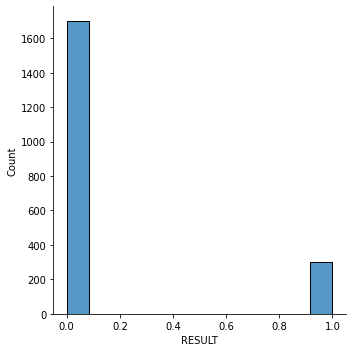

In [ ]:
sns.displot(y)

In [ ]:
x

array([[0.26218197, 0.10989011, 0.30185497, ..., 0.37142857, 0.25187032,
        0.22830189],
       [0.26218197, 0.10989011, 0.2643339 , ..., 0.57142857, 0.32917706,
        0.34339623],
       [0.39111686, 0.11263736, 0.30185497, ..., 0.37142857, 0.25187032,
        0.22830189],
       ...,
       [0.21561018, 0.08241758, 0.40556492, ..., 0.6       , 0.40149626,
        0.34339623],
       [0.63518758, 0.07967033, 0.40556492, ..., 0.74285714, 0.50374065,
        0.47358491],
       [0.63518758, 0.07967033, 0.52824621, ..., 0.77142857, 0.52369077,
        0.53207547]])

Splitting into training and test dataset

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=100)

Here model1 , model2 and model3 represents Logistic Regression , Decision Tree and Random Forest models respectively.

In [ ]:
model1=LogisticRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()

Training the models

In [ ]:
model1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model2.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
model3.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Predicting the values

In [ ]:
pred1=model1.predict(X_test)

In [ ]:
pred2=model2.predict(X_test)

In [ ]:
pred3=model3.predict(X_test)

Importing relevant libraries for model accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score

Confusion matrix for logistic regression

In [ ]:
print("Confusion matrix for logistic regression:")
confusion_matrix(Y_test,pred1)

Confusion matrix for logistic regression:


array([[480,   0],
       [ 78,  42]])

Accuracy check for logistic regression

In [ ]:
accuracy=0
for i in range(len(pred1)):
  if pred1[i]==Y_test.iloc[i]:
    accuracy +=1
Accuracy = accuracy/(len(pred1))
print("Accuracy for logistic regression model:",Accuracy) 
print("Accuracy_score for logistic regression model",accuracy_score(Y_test,pred1))
print("roc auc score for logistic regression model",roc_auc_score(Y_test,pred1))
print('precision score for logistic regression model is:',precision_score(Y_test,pred1))
print("recall score for logistic regression model:",recall_score(Y_test,pred1))
print("f1 score for logistic regression model:",f1_score(Y_test,pred1))

Accuracy for logistic regression model: 0.87
Accuracy_score for logistic regression model 0.87
roc auc score for logistic regression model 0.675
precision score for logistic regression model is: 1.0
recall score for logistic regression model: 0.35
f1 score for logistic regression model: 0.5185185185185185


Confusion Matrix for Decision Tree model

In [ ]:
print("Confusion matrix for Decision Tree Model:")
confusion_matrix(Y_test,pred1)

Confusion matrix for Decision Tree Model:


array([[480,   0],
       [ 78,  42]])

Accuracy check for Decision Tree model

In [ ]:
accuracy2=0
for i in range(len(pred2)):
  if pred2[i]==Y_test.iloc[i]:
    accuracy2 +=1
Accuracy2 = accuracy2/(len(pred2))
print("Accuracy for Decision tree model:",Accuracy2) 
print("Accuracy_score for Decision tree model",accuracy_score(Y_test,pred2))
print("roc auc score for Decision tree model",roc_auc_score(Y_test,pred2))
print('precision score for Decision tree model:',precision_score(Y_test,pred2))
print("recall score for Decision tree model:",recall_score(Y_test,pred2))
print("f1 score for Decision tree model:",f1_score(Y_test,pred2))


Accuracy for Decision tree model: 1.0
Accuracy_score for Decision tree model 1.0
roc auc score for Decision tree model 1.0
precision score for Decision tree model: 1.0
recall score for Decision tree model: 1.0
f1 score for Decision tree model: 1.0


Accuracy of Random Forest model

In [ ]:
accuracy3=0
for i in range(len(pred3)):
  if pred3[i]==Y_test.iloc[i]:
    accuracy3 +=1
Accuracy3 = accuracy3/(len(pred3)) 
print("Accuracy for Random Forest model:",Accuracy3) 

Accuracy for Random Forest model: 1.0


Saving models to Disk

In [ ]:
pickle.dump(model1, open('model.pkl',"wb"))

In [ ]:
pickle.dump(model2, open('model2.pkl',"wb"))

In [ ]:
pickle.dump(model3, open('model3.pkl',"wb"))

 **Thank you**